In [ ]:
BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os


In [ ]:
class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

print("✅ Model loaded successfully")


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 107MB/s] 


✅ Model loaded successfully


In [ ]:
embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]

print("✅ Embeddings shape:", embeddings.shape)
print("✅ Total image paths:", len(image_paths))


✅ Embeddings shape: (958, 128)
✅ Total image paths: 958


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


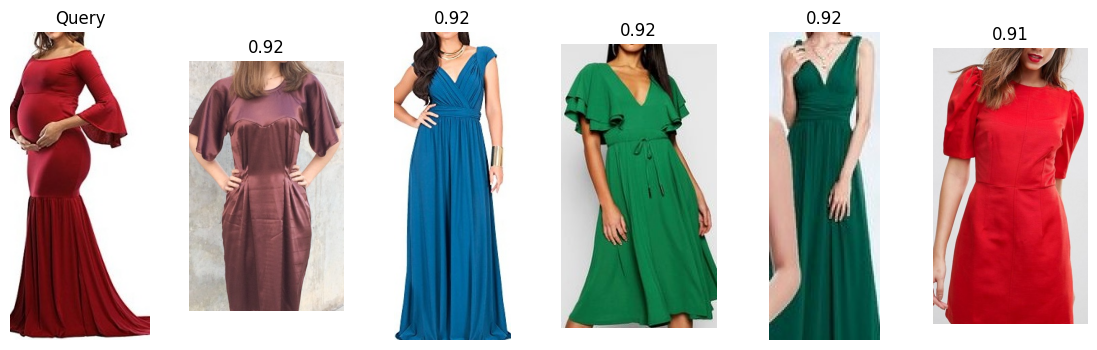

In [ ]:


from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os


BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"


query_image_path = "/content/drive/MyDrive/fashion/women/women_dresses/bell_sleeve/full_0_1901000032.jpeg"


class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)


device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()


similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]


plt.figure(figsize=(14,4))


plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")


for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


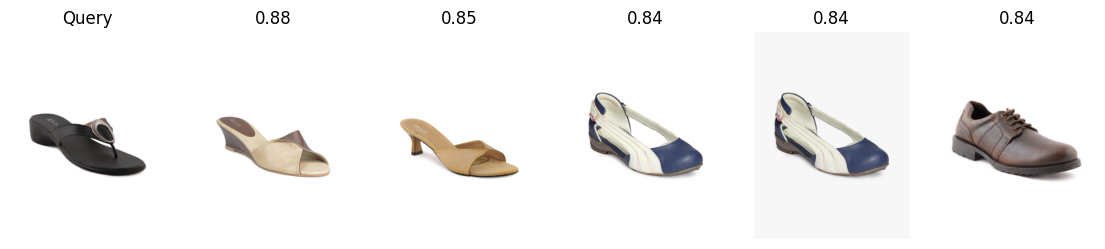

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os


BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"

query_image_path = "/content/drive/MyDrive/fashion/women/footwears/13480.jpg"


class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)


device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()


embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()


similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]


plt.figure(figsize=(14,4))


plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")


for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


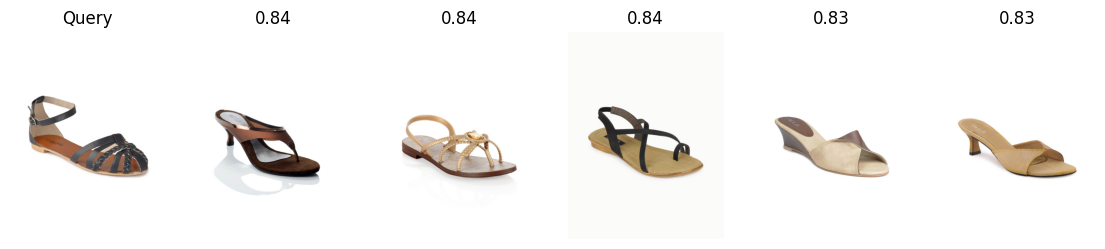

In [ ]:


from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os


BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"


query_image_path = "/content/drive/MyDrive/fashion/women/footwears/13641.jpg"


class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)

# -------- LOAD MODEL --------
device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

# -------- LOAD EMBEDDINGS & PATHS --------
embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]

# -------- TRANSFORM --------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# -------- QUERY EMBEDDING --------
query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()

# -------- SIMILARITY SEARCH --------
similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]

# -------- DISPLAY RESULTS --------
plt.figure(figsize=(14,4))

# Query image
plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")

# Top-5 similar images
for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


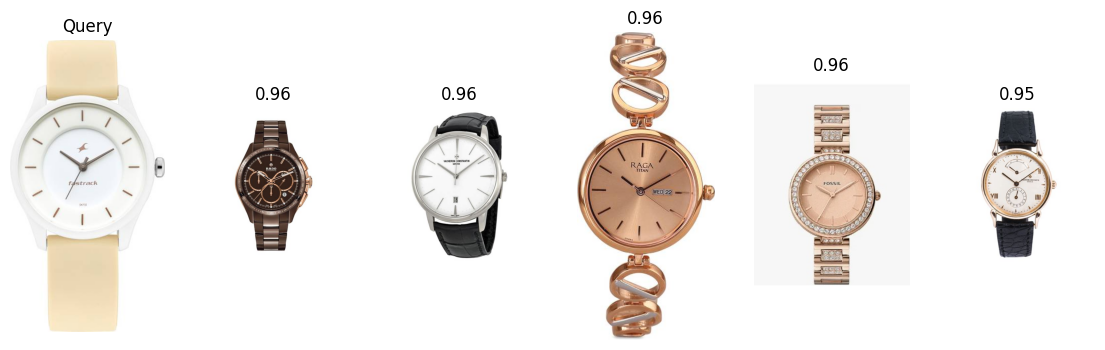

In [ ]:
# ===== ONE CELL: QUERY IMAGE → TOP-5 SIMILAR RESULTS =====

from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

# -------- PATHS (CHANGE ONLY IF NEEDED) --------
BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"

# 🔹 QUERY IMAGE (PASTE ANY IMAGE PATH FROM DRIVE)
query_image_path = "/content/drive/MyDrive/fashion/women/watches/Fastrack_742.jpeg"

# -------- MODEL DEFINITION (MUST MATCH TRAINING) --------
class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)

# -------- LOAD MODEL --------
device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

# -------- LOAD EMBEDDINGS & PATHS --------
embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]

# -------- TRANSFORM --------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# -------- QUERY EMBEDDING --------
query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()

# -------- SIMILARITY SEARCH --------
similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]

# -------- DISPLAY RESULTS --------
plt.figure(figsize=(14,4))

# Query image
plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")

# Top-5 similar images
for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


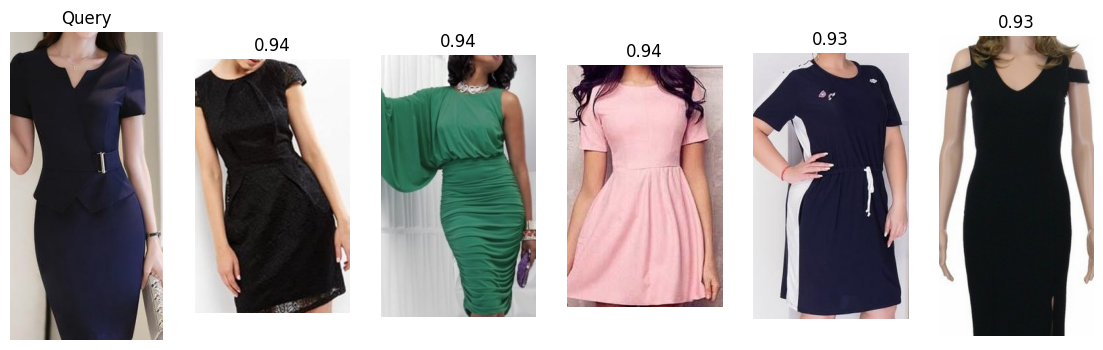

In [ ]:
# ===== ONE CELL: QUERY IMAGE → TOP-5 SIMILAR RESULTS =====

from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

# -------- PATHS (CHANGE ONLY IF NEEDED) --------
BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"

# 🔹 QUERY IMAGE (PASTE ANY IMAGE PATH FROM DRIVE)
query_image_path = "/content/drive/MyDrive/fashion/women/women_dresses/short_sleeve/full_0_1901000195.jpg"

# -------- MODEL DEFINITION (MUST MATCH TRAINING) --------
class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)

# -------- LOAD MODEL --------
device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

# -------- LOAD EMBEDDINGS & PATHS --------
embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]

# -------- TRANSFORM --------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# -------- QUERY EMBEDDING --------
query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()

# -------- SIMILARITY SEARCH --------
similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]

# -------- DISPLAY RESULTS --------
plt.figure(figsize=(14,4))

# Query image
plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")

# Top-5 similar images
for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


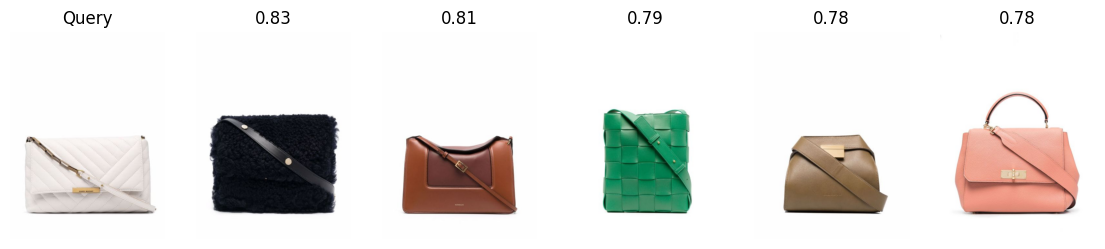

In [ ]:
# ===== ONE CELL: QUERY IMAGE → TOP-5 SIMILAR RESULTS =====

from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os


BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"


query_image_path = "/content/drive/MyDrive/fashion/women/bags/wbag10260.png"


class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)


device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()


embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()


similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]


plt.figure(figsize=(14,4))


plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")


for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 109MB/s] 


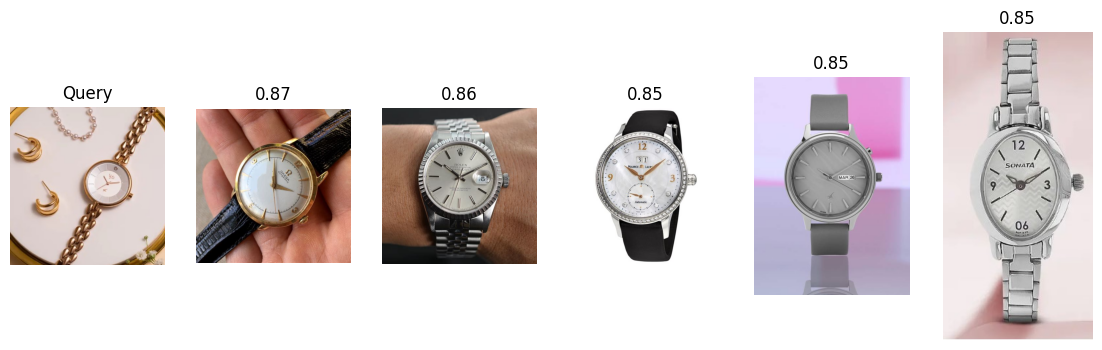

In [ ]:
# ===== ONE CELL: QUERY IMAGE → TOP-5 SIMILAR RESULTS =====

from google.colab import drive
drive.mount("/content/drive")

import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os


BASE_PATH = "/content/drive/MyDrive/Aadhar"

MODEL_PATH = f"{BASE_PATH}/triplet_model.pth"
EMB_PATH = f"{BASE_PATH}/image_embeddings.npy"
PATHS_FILE = f"{BASE_PATH}/image_paths.txt"


query_image_path = "/content/drive/MyDrive/fashion/women/watches/Screenshot 2025-09-24 093813.jpg"


class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.backbone = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1280, 128)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return nn.functional.normalize(x)


device = "cuda" if torch.cuda.is_available() else "cpu"

model = EmbeddingNet().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()


embeddings = np.load(EMB_PATH)

with open(PATHS_FILE) as f:
    image_paths = [line.strip() for line in f]


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


query_img = Image.open(query_image_path).convert("RGB")
query_tensor = transform(query_img).unsqueeze(0).to(device)

with torch.no_grad():
    query_emb = model(query_tensor).cpu().numpy()


similarities = cosine_similarity(query_emb, embeddings)[0]
top5_idx = similarities.argsort()[::-1][1:6]

plt.figure(figsize=(14,4))


plt.subplot(1,6,1)
plt.imshow(query_img)
plt.title("Query")
plt.axis("off")


for i, idx in enumerate(top5_idx):
    img_path = image_paths[idx]

    plt.subplot(1,6,i+2)
    if os.path.exists(img_path):
        plt.imshow(Image.open(img_path))
        plt.title(f"{similarities[idx]:.2f}")
    else:
        plt.text(0.5, 0.5, "Missing", ha="center")
    plt.axis("off")

plt.show()
